In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

### Download images

Download URLs from google images:

`urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);`

`window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));`

In [5]:
path = Path('data/pokemons/'); path.ls()

[PosixPath('data/pokemons/models'),
 PosixPath('data/pokemons/export.pkl'),
 PosixPath('data/pokemons/raichu'),
 PosixPath('data/pokemons/pikachu.csv'),
 PosixPath('data/pokemons/cleaned.csv'),
 PosixPath('data/pokemons/.ipynb_checkpoints'),
 PosixPath('data/pokemons/pikachu'),
 PosixPath('data/pokemons/raichu.csv')]

In [6]:
category = 'pikachu'

In [7]:
category = 'raichu'

In [16]:
download_images(path/f'{category}.csv', path/f'{category}', max_pics=200)

Remove images that cannot be opened

In [18]:
for c in ['pikachu', 'raichu']:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

pikachu


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/pokemons/pikachu/00000108.jpg'>
cannot identify image file <_io.BufferedReader name='data/pokemons/pikachu/00000096.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


raichu


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


### Visualize data

In [8]:
bs = 64

In [9]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, bs=bs, size=224, 
                                  ds_tfms=get_transforms()).normalize(imagenet_stats)

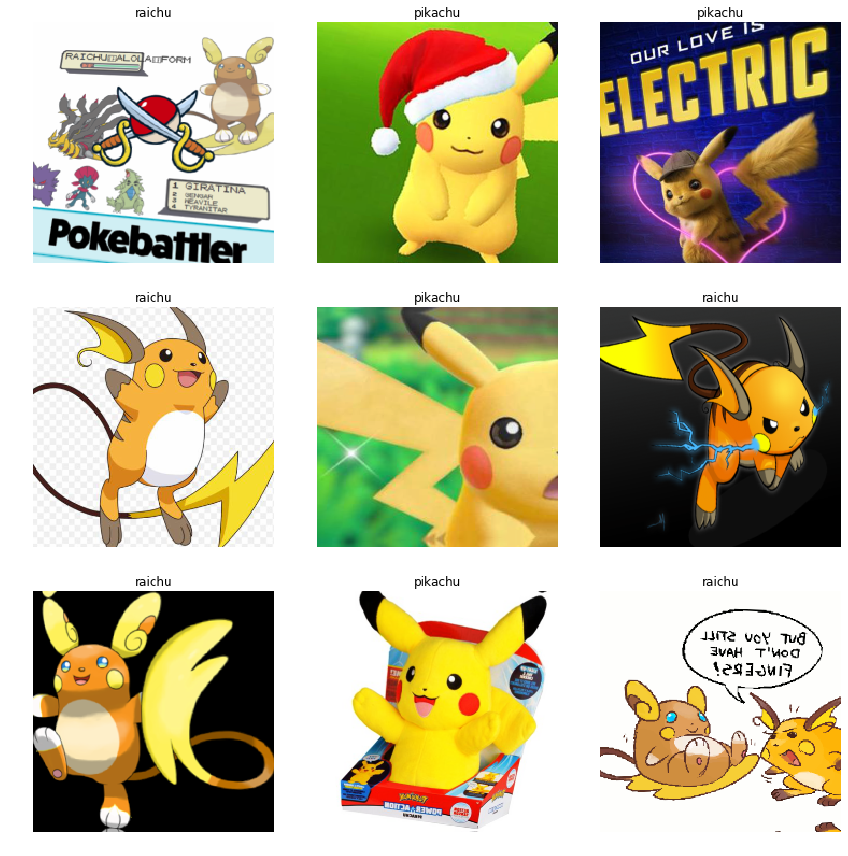

In [10]:
data.show_batch(3)

In [10]:
len(data.train_ds), len(data.valid_ds), data.c, data.classes

(313, 78, 2, ['pikachu', 'raichu'])

### Model

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [26]:
learn.lr_find()

epoch     train_loss  valid_loss  error_rate  time    
0         0.982912    #na#        00:02       
1         0.986157    #na#        00:01       
2         0.969624    #na#        00:01       
3         0.963263    #na#        00:01       
4         0.954209    #na#        00:01       
5         0.924103    #na#        00:01       
6         0.922328    #na#        00:01       
7         0.921516    #na#        00:01       
8         0.924606    #na#        00:01       
9         0.894363    #na#        00:01       
10        0.865454    #na#        00:01       
11        0.832849    #na#        00:01       
12        0.787341    #na#        00:01       
13        0.729695    #na#        00:01       
14        0.669328    #na#        00:01       
15        0.605155    #na#        00:01       
16        0.548176    #na#        00:01       
17        0.506506    #na#        00:01       
18        0.505344    #na#        00:01       
19        0.531676    #na#        00:01       
20   

Exception: Error: `libsixel` is needed. See https://github.com/saitoha/libsixel

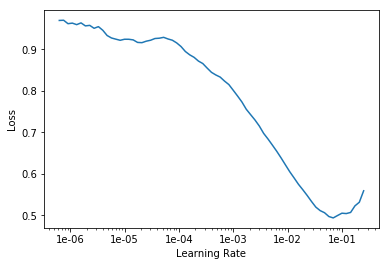

In [34]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(4, max_lr=slice(None, 1e-3, None))

epoch,train_loss,valid_loss,error_rate,time
0,0.859915,0.650675,0.333333,00:05
1,0.723714,0.346830,0.128205,00:02
2,0.607622,0.259968,0.128205,00:02
3,0.516477,0.243040,0.115385,00:02


In [14]:
learn.fit_one_cycle(4, max_lr=slice(None, 1e-3, None))

epoch,train_loss,valid_loss,error_rate,time
0,0.299747,0.217597,0.115385,00:02
1,0.267563,0.188368,0.115385,00:02
2,0.250205,0.181709,0.102564,00:02
3,0.232564,0.177111,0.102564,00:02


In [15]:
interp = learn.interpret()

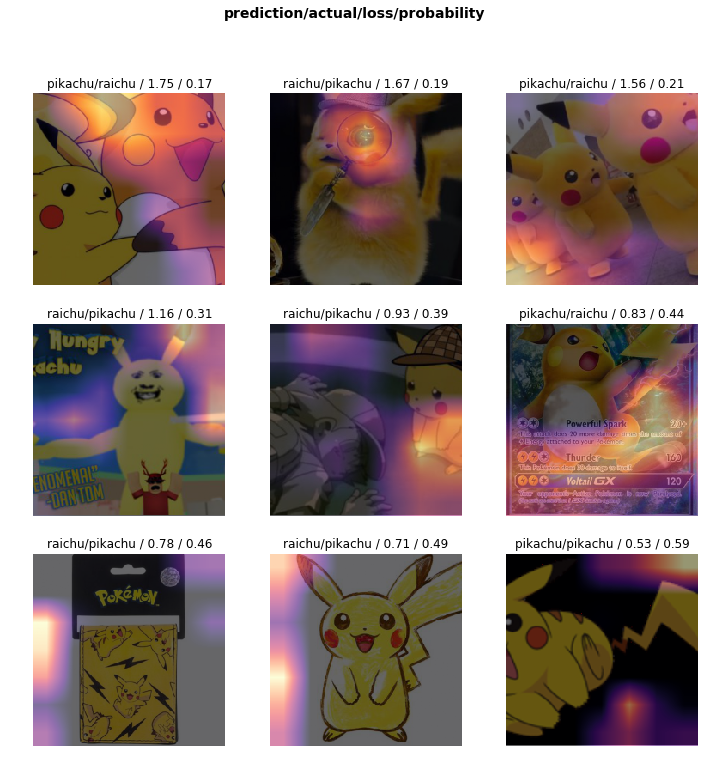

In [16]:
interp.plot_top_losses(9)

In [17]:
interp.most_confused()

[('pikachu', 'raichu', 5), ('raichu', 'pikachu', 3)]

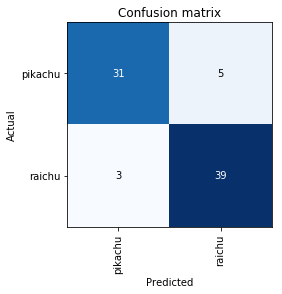

In [18]:
interp.plot_confusion_matrix()

In [33]:
learn.save('stage-1')

### Clean up data

In [19]:
from fastai.widgets import *

In [11]:
db = (ImageList.from_folder(path)
    .split_none()
    .label_from_folder()
    .transform(get_transforms(), size=224)
    .databunch())

In [32]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [35]:
learn_cln.load('stage-1');

In [37]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [41]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

### Rerun training after cleaning

In [45]:
??ImageDataBunch.from_csv

Signature:
ImageDataBunch.from_csv(
    ['path: Union[pathlib.Path, str]', 'folder: Union[pathlib.Path, str] = None', 'label_delim: str = None', "csv_labels: Union[pathlib.Path, str] = 'labels.csv'", 'valid_pct: float = 0.2', 'fn_col: int = 0', 'label_col: int = 1', "suffix: str = ''", 'delimiter: str = None', "header: Union[int, str, NoneType] = 'infer'", '**kwargs: Any'],
) -> 'ImageDataBunch'
Source:   
    @classmethod
    def from_csv(cls, path:PathOrStr, folder:PathOrStr=None, label_delim:str=None, csv_labels:PathOrStr='labels.csv',
                 valid_pct:float=0.2, fn_col:int=0, label_col:int=1, suffix:str='', delimiter:str=None,
                 header:Optional[Union[int,str]]='infer', **kwargs:Any)->'ImageDataBunch':
        "Create from a csv file in `path/csv_labels`."
        path = Path(path)
        df = pd.read_csv(path/csv_labels, header=header, delimiter=delimiter)
        return cls.from_df(path, df, folder=folder, label_delim=label_delim, valid_pct=valid_pct,
   

In [12]:
data = ImageDataBunch.from_csv(path, csv_labels='cleaned.csv', bs=bs, size=224,
                              ds_tfms=get_transforms()).normalize(imagenet_stats)

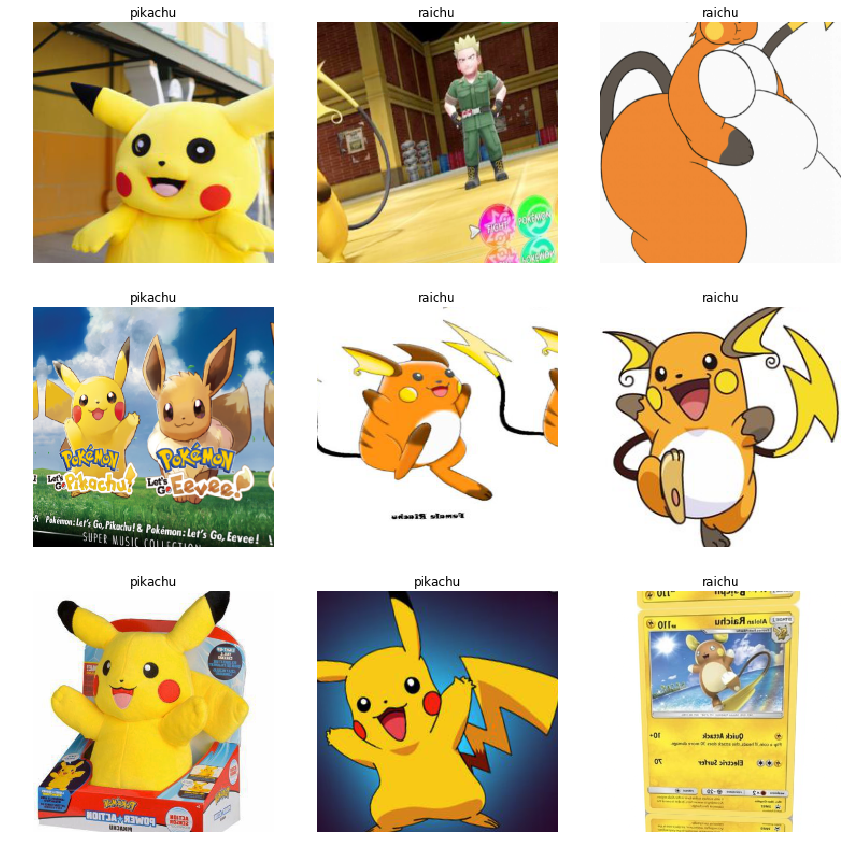

In [13]:
data.show_batch(3)

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['pikachu', 'raichu'], 2, 302, 75)

In [51]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [52]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.024033,0.511486,0.240000,00:03
1,0.712326,0.278789,0.106667,00:02
2,0.536832,0.204525,0.080000,00:02
3,0.418401,0.162033,0.080000,00:02
4,0.350064,0.156464,0.080000,00:02
5,0.298148,0.151861,0.080000,00:02


In [53]:
interp = learn.interpret()

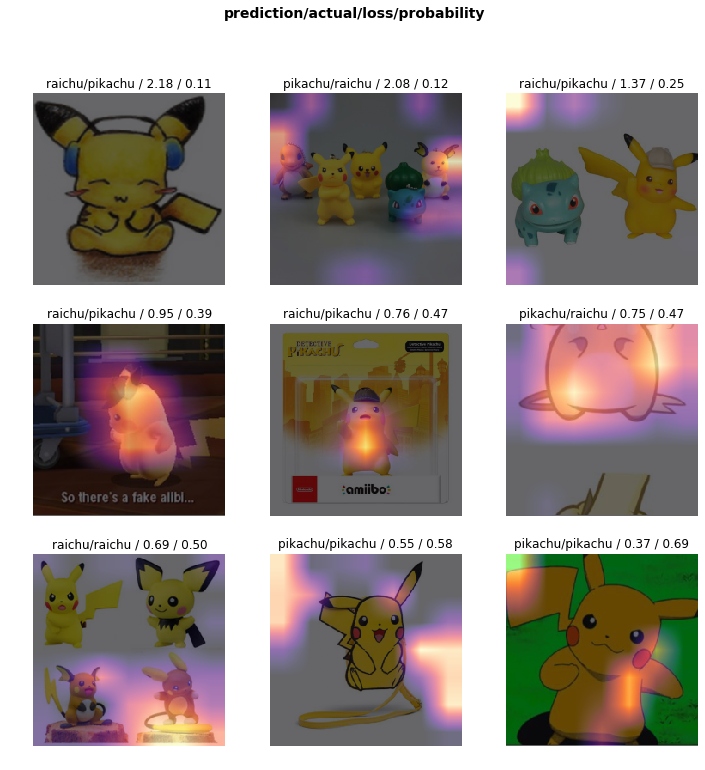

In [55]:
interp.plot_top_losses(9)

In [58]:
learn.save('pokemons-stage-1')

In [59]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


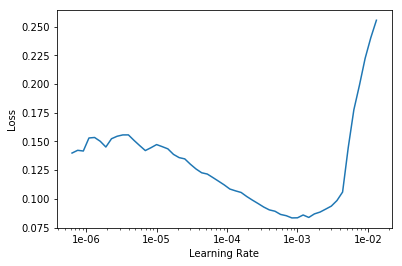

In [57]:
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.151569,0.138500,0.080000,00:02
1,0.133379,0.137534,0.066667,00:03
2,0.112989,0.126157,0.066667,00:03
3,0.100313,0.123859,0.066667,00:03


In [61]:
learn.save('pokemons-stage-2')

## Productionize the model

In [34]:
classes = ['pikachu', 'raichu']
db = ImageDataBunch.single_from_classes(path, classes=classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = cnn_learner(db, models.resnet34)
learn.load('pokemons-stage-2');
learn.export(file='pokemons.pkl')

In [35]:
learn = load_learner(path, file='pokemons.pkl')

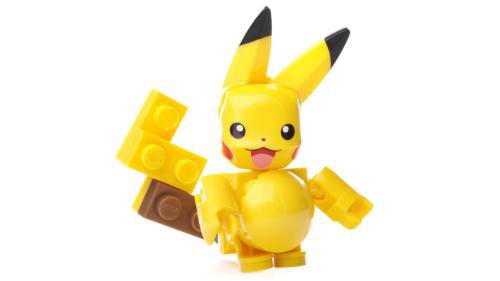

In [32]:
image = open_image(path/'pikachu'/'00000000.jpg'); image

In [37]:
defaults.device = torch.device('cpu')

In [38]:
pred_class, pred_idx, outputs = learn.predict(image)

In [39]:
print(pred_class, pred_idx, outputs)

pikachu tensor(0) tensor([9.9920e-01, 8.0368e-04])
